<a href="https://colab.research.google.com/github/eduardodut/projetos-algoritmos/blob/master/Projeto%201/CANA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###<b>a) Realizar a leitura do arquivo de entrada em estruturas de dados apropriadas, buscando eficiência não só no uso de memória, mas também no tempo de processamento dos algoritmos que farão uso destes dados. (1,0 ponto)


In [1]:
#download do arquivo entrada.txt
!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/projetos-algoritmos/master/Projeto%201/Dados/entrada.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.3M  100 10.3M    0     0  8265k      0  0:00:01  0:00:01 --:--:-- 8259k


In [2]:
#leitura do arquivo e inicialização das variáveis
import numpy as np
fname = '/content/entrada.txt'
# fname = 'C:/Users/Eduar/Documents/GitHub/projetos-algoritmos/Projeto 1/Dados/entrada.txt'
dados_contratos= []

N = 0
M = 0
T = 0


cnt = 0 #armazena o número de vezes que uma linha do arquivo será lida
with open(fname, 'r') as file:
    for line in file:
      cnt = cnt + 1 #2
      #separa a primeira linha do arquivo em uma estrutura separada
      if cnt == 1:
        N = int(line.split()[0]) #NÚMERO DE MESES
        print("Número de meses compreendidos pelo arquivo: ", N)
        M = int(line.split()[1]) #NÚMERO DE FORNECEDORES
        print("Número de fornecedores inclusos no arquivo: ", M)
        T = float(line.split()[2]) #TAXA PARA MUDANCA DE FORNECEDOR
        print("Taxa para mudança de fornecedor: ",T)
        dados_contratos = np.zeros([M+1,N+1,N+1])
        dados_contratos[::] = np.NaN
        # 120 100 100.0
        
      #armazena todo o restante das linhas do arquivo em uma estrutura própria
      else:
          
        fornecedor = int(line.split()[0])#1 
        mes_inicial = int(line.split()[1])#1 
        mes_final = int(line.split()[2])#1 
        valor_contrato = float(line.split()[3])#19.2
        if valor_contrato > 0.0 and valor_contrato!= np.NaN :
          dados_contratos[fornecedor][mes_inicial][mes_final] = valor_contrato
        else:
          dados_contratos[fornecedor][mes_inicial][mes_final] = np.NaN
  
    print("Número de linhas no arquivo: ", cnt)
    print("Número de dados de contratos: ", cnt-1)
    file.close() 

class Contrato:
  def __init__(self, empresa, mes_inicial, mes_final, valor):
    self.empresa = empresa
    self.mes_inicial = mes_inicial
    self.mes_final = mes_final
    self.valor = valor

  def __repr__(self):
    return  "(" + ', '.join(str(x) for x in [self.empresa, self.mes_inicial, self.mes_final, self.valor]) +")"


# periodo = mes_final-mes_inicial+1

Número de meses compreendidos pelo arquivo:  120
Número de fornecedores inclusos no arquivo:  100
Taxa para mudança de fornecedor:  100.0
Número de linhas no arquivo:  726001
Número de dados de contratos:  726000


In [3]:
#os dados estão guardados em estrutura de 3 dimensões, que podemos acessar passando o número da empresa, o mês inicial e o período do contrato
#                     empresa  mês_inicial  mes_final
print(dados_contratos[   1   ][     1     ][    1   ])
print(dados_contratos[   1   ][     2     ][    2   ])
print(dados_contratos[   1   ][     3     ][    3   ])

19.2
14.2
12.5


###<b>b) Apresentar a complexidade das estruturas utilizadas para armazenar os dados de entrada, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (1,0 ponto)


In [4]:
def funcao_linhas_arquivo(N, M):
  """Calcula o número de linhas do arquivo em função do número de meses N e do número de fornecedores M

    Parâmetros:
    N (int): Número de meses compreendidos no arquivo
    M (int): Número de fornecedores com oferta de contratos
    
    Retorna:
    int: ((1+N)*N*M)/2+1, onde o "+ 1" corresponde à linha inicial do arquivo
    
   """
  return ((1+N)*N*M)/2+1

print("Número de linhas do arquivo (calculado): ", funcao_linhas_arquivo(N, M))
print("Número de linhas do arquivo (contado na leitura do arquivo): ", cnt)
print("\u03B8(funcao_linha_arquivo) = \u03B8(M*N^2) é a complexidade da estrutura para um arquivo onde as empresas possuam todos os contratos para cada período")
# print("O(funcao_linha_arquivo) = O(M*N^2) caso nem todas as empresas possuam contratos para todos os períodos")


Número de linhas do arquivo (calculado):  726001.0
Número de linhas do arquivo (contado na leitura do arquivo):  726001
θ(funcao_linha_arquivo) = θ(M*N^2) é a complexidade da estrutura para um arquivo onde as empresas possuam todos os contratos para cada período


$$
\Theta(M\sum_{n=0}^{N}(N-n))=\Theta (MN^{2})
$$

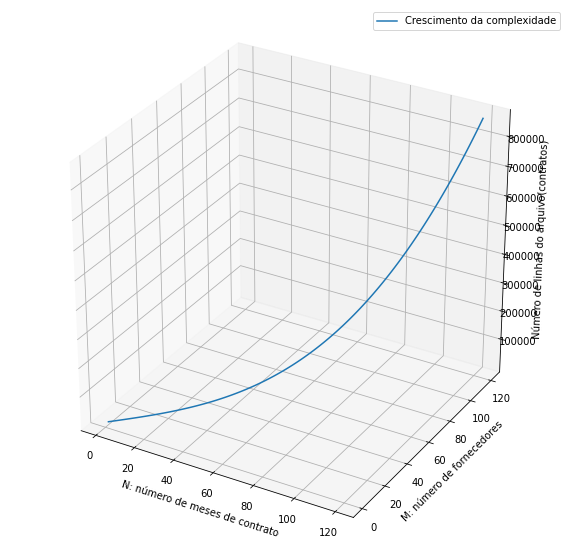

In [5]:
#plotagem do gráfico do crescmento da complexidade em função de M e N

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.arange(1,121,1)
y = np.arange(1,121,1)
z = funcao_linhas_arquivo(x,y)

ax.set_xlabel('N: número de meses de contrato')
ax.set_zlim(0,N)
ax.set_ylabel('M: número de fornecedores')
ax.set_ylim(0,M)
ax.set_zlabel('Número de linhas do arquivo(contratos)')
ax.set_zlim(0,90000)

ax.set_autoscale_on(2)
ax.plot(x, y, z, label='Crescimento da complexidade')
ax.legend()
fig.set_size_inches(10,10)
plt.show()


###<b>c) Criar uma função eficiente que retorna o contrato individual, referente ao período completo de n meses, que possui o menor valor. (1,0 ponto)


In [0]:
# periodo = mes_final-mes_inicial+1
# mes_final = periodo+mes_inicial-1
def busca_menor_contrato_individual(mes_inicial, periodo, lista_empresas = np.arange(1,M+1)):
  """Retorna o menor valor

    Parâmetros:
    periodo (int): período de meses requerido para o contrato mais barato
    mes_inicial (int): mês inicial do contrato
    
    Retorna:
    [int, int, int, float]: [empresa, mes_inicial, periodo, valor_min] do contrato mais barato
    caso não haja valor válido retorna (np.NaN, int, int, np.NaN)

   """
  #Possível problema: pode ser que a empresa 1 não tenha contrato 

  empresa = 0

  valor_min = np.NaN
  
  mes_final = periodo + mes_inicial - 1

  lista_contratos = []

  for i in lista_empresas:
    try:
      valor_contrato = dados_contratos[i][mes_inicial][mes_final]
    except IndexError:
      continue
    else:  
      #se o valor do contrato for válido e o valor mínimo não for, ou valor contrato menor que valor mínimo
      if ((not np.isnan(valor_contrato)) and np.isnan(valor_min)) or (valor_contrato <= valor_min):
        

        if(valor_contrato < valor_min):

          lista_contratos = []

          
        valor_min = valor_contrato
        lista_contratos.append(Contrato(i,mes_inicial, mes_final, valor_contrato))
      
  return lista_contratos

In [7]:
#Busca menor contrato de período completo de 120 meses
menor_valor = 100
cnt = 0
for i in range(1,121):
  contratos = busca_menor_contrato_individual(mes_inicial= i,periodo= 1)
  if(len(contratos) == 0):
    next
  try:
    if contratos[0].valor <= menor_valor:
      print(contratos)
      cnt = cnt + len(contratos)
      menor_valor = contratos[0].valor
  except IndexError:
    print(i)

print(cnt)

[(90, 1, 1, 10.2)]
[(59, 2, 2, 10.1)]
[(47, 3, 3, 10.1)]
[(96, 4, 4, 10.0)]
[(81, 6, 6, 10.0)]
[(32, 8, 8, 10.0)]
[(73, 9, 9, 10.0)]
[(64, 14, 14, 10.0)]
[(18, 15, 15, 10.0)]
[(19, 19, 19, 10.0), (64, 19, 19, 10.0)]
[(28, 20, 20, 10.0)]
[(22, 21, 21, 10.0)]
[(52, 23, 23, 10.0)]
[(9, 24, 24, 10.0), (89, 24, 24, 10.0), (94, 24, 24, 10.0)]
[(39, 26, 26, 10.0)]
[(14, 27, 27, 10.0)]
[(22, 28, 28, 10.0)]
[(9, 30, 30, 10.0), (67, 30, 30, 10.0)]
[(55, 31, 31, 10.0)]
[(39, 36, 36, 10.0)]
[(15, 51, 51, 10.0)]
[(8, 53, 53, 10.0)]
[(40, 59, 59, 10.0)]
[(42, 61, 61, 10.0)]
[(82, 63, 63, 10.0)]
[(45, 64, 64, 10.0)]
[(22, 67, 67, 10.0)]
[(16, 68, 68, 10.0)]
[(11, 70, 70, 10.0)]
[(15, 74, 74, 10.0)]
[(15, 75, 75, 10.0)]
[(30, 76, 76, 10.0)]
[(59, 78, 78, 10.0)]
[(26, 81, 81, 10.0)]
[(99, 82, 82, 10.0)]
[(43, 86, 86, 10.0)]
[(60, 88, 88, 10.0)]
[(41, 93, 93, 10.0)]
[(93, 99, 99, 10.0)]
[(8, 100, 100, 10.0)]
[(29, 101, 101, 10.0)]
[(60, 107, 107, 10.0)]
[(11, 110, 110, 10.0)]
[(12, 111, 111, 10.0), (59,

###<b>d) Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (1,0 ponto)

A função verifica o contrato de cada empresa no período especificado, dessa forma são feitas M verificações para descobrir qual empresa possui o menor, independentemente se há um contrato válido ou não. Portanto a complexidade da função é:
$$
\Theta (M)
$$



###<b>e) Criar uma função eficiente que retorna o contrato individual de menor valor do mercado, independente do período a que se refere. (1,0 ponto)


In [8]:
def menor_valor_contrato(periodo= 1, lista_meses = np.arange(1,N+1)):
  
  lista_saida = []
  menor_valor = busca_menor_contrato_individual(mes_inicial= 1,periodo= periodo)
  for i in lista_meses:
    # try:
    menor_contrato_i = busca_menor_contrato_individual(mes_inicial= i,periodo= periodo)
    if len(menor_contrato_i) == 0:
      continue

    if menor_contrato_i[0].valor <= menor_valor[0].valor:
      
      if menor_contrato_i[0].valor < menor_valor[0].valor:
        lista_saida = []
      
      
      menor_valor = menor_contrato_i
      

      lista_saida = lista_saida + menor_valor  
    
    

  return lista_saida
print(menor_valor_contrato(119))


[(61, 1, 119, 682.1)]


###<b>f) Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (1,0 ponto)


A função verifica realiza a chamada da função do item c) para todos os meses iniciais disponíveis (1 a N). Portanto, se a complexidade da função do item c) é $\Theta (M)$ a complexidade da nova função é:
$$
\Theta (MN)
$$



###**g) Criar uma função eficiente que retorna o contrato individual, referente ao período completo de x meses (passado como parâmetro, x ≤ n), que possui o menor valor. (1,0 ponto)**


A função utilizada para esse item foi criada no item **e)**. Abaixo segue a utilização da função para um período de x meses.

In [9]:
x = 10
menor_valor_contrato(periodo= x)

[(62, 6, 15, 52.1)]

Chamada da função para todos os períodos de x meses, para todo x <= N = 120

In [10]:
print("Melhores contratos para o período de 1 mês: ", menor_valor_contrato(periodo= 1))
for i in range(2,121):
  print("Melhores contratos para o período de ",i," meses: ", menor_valor_contrato(periodo= i))

Melhores contratos para o período de 1 mês:  [(96, 4, 4, 10.0), (81, 6, 6, 10.0), (32, 8, 8, 10.0), (73, 9, 9, 10.0), (64, 14, 14, 10.0), (18, 15, 15, 10.0), (19, 19, 19, 10.0), (64, 19, 19, 10.0), (28, 20, 20, 10.0), (22, 21, 21, 10.0), (52, 23, 23, 10.0), (9, 24, 24, 10.0), (89, 24, 24, 10.0), (94, 24, 24, 10.0), (39, 26, 26, 10.0), (14, 27, 27, 10.0), (22, 28, 28, 10.0), (9, 30, 30, 10.0), (67, 30, 30, 10.0), (55, 31, 31, 10.0), (39, 36, 36, 10.0), (15, 51, 51, 10.0), (8, 53, 53, 10.0), (40, 59, 59, 10.0), (42, 61, 61, 10.0), (82, 63, 63, 10.0), (45, 64, 64, 10.0), (22, 67, 67, 10.0), (16, 68, 68, 10.0), (11, 70, 70, 10.0), (15, 74, 74, 10.0), (15, 75, 75, 10.0), (30, 76, 76, 10.0), (59, 78, 78, 10.0), (26, 81, 81, 10.0), (99, 82, 82, 10.0), (43, 86, 86, 10.0), (60, 88, 88, 10.0), (41, 93, 93, 10.0), (93, 99, 99, 10.0), (8, 100, 100, 10.0), (29, 101, 101, 10.0), (60, 107, 107, 10.0), (11, 110, 110, 10.0), (12, 111, 111, 10.0), (59, 111, 111, 10.0), (63, 112, 112, 10.0), (50, 113, 11

###**h) Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (1,0 ponto)**


Mesmo que a função seja a mesma do item **e)**, o número de conntratos que serão pesquisados depende do período passado como argumento, pois à medida que o mês de início de um contrato vai avançando a possibilidade de períodos vai decrescendo. </br>
A complexidade da função pode ser expressado quando, no pior caso, o período pesquisado possuir o máximo de períodos possíveis e, no melhor caso, quando o período se aproximar de N e cada empresa só possuir 1 contrato para comparação.</br>
Portanto o limite assintótico superior pode ser expressado por:
$$
\mathcal{O} (MN)
$$
O limite inferior é expressado por:
$$
\Omega(M)
$$



###**i) Criar um método que sugere quais contratos de energia devem ser contratados para os próximos n meses. (1,0 ponto)**


In [14]:
from itertools import combinations 
import numpy as np  
import pandas as pd

# memoria = pd.DataFrame(index = np.arange(1,121,1), columns = np.arange(1,121,1))

contrato_referencia =  busca_menor_contrato_individual(1,120)
valor_referencia = contrato_referencia[0].valor


num_maximo_trocas = int(valor_referencia/T) #Número máximo de troca de contratos que não exceda o valor de referência

periodo_minimo = 1

valor_minimo = valor_referencia*2
contratos_valor_minimo = []
for num_trocas in range(1, num_maximo_trocas):
 
  
  limite_inferior = 2 + periodo_minimo - 1
  limite_superior = N - periodo_minimo + 1
  lista_meses = np.arange(limite_inferior,limite_superior+1,1)
  
  lista_combinacoes_trocas = list(combinations(lista_meses, num_trocas))

  for possiveis_trocas in lista_combinacoes_trocas:
    lista_possiveis_trocas = list(possiveis_trocas)
    lista_possiveis_trocas.insert(0,1)
    lista_possiveis_trocas.append(N)
    periodo = []

    for i in range(1,len(lista_possiveis_trocas)-1):
      periodo.append(lista_possiveis_trocas[i]-1-lista_possiveis_trocas[i-1]+1)
    
    periodo.append(N-lista_possiveis_trocas[len(lista_possiveis_trocas)-2]+1)

    periodo_menor_ideal = False
    for p in periodo:
      if p < periodo_minimo:
        periodo_menor_ideal = True

    if periodo_menor_ideal: continue


    mes = 1
    contratos = []
    for p in periodo:
      
      pesquisa_contrato = memoria.loc[mes, p]
      #verifica se o valor num_trocasá foi pesquisado
      if type(pesquisa_contrato) != list:
        pesquisa_contrato = busca_menor_contrato_individual(mes,p)
        memoria.loc[mes, p] = pesquisa_contrato
      
      contratos.append(pesquisa_contrato)
      mes = pesquisa_contrato[0].mes_final + 1
      
    valor_atual = 0  
    for contrato in contratos:
      valor_atual = valor_atual + contrato[0].valor 

    valor_atual = valor_atual + T*num_trocas

    if valor_atual < valor_minimo:
      contrato_valor_minimo = contratos
      valor_minimo = valor_atual


    # print(valor_atual)
    '''
    quando num_trocas for igual a 1, que permite o seccionamento do período em apenas 1 
    vez, deve ser verificado qual período mínimo que deverá ser avaliado, que possua
    um valor maior do que a taxa T de recisão de contrato.    
    '''
    if num_trocas == 1 :
      for contrato in contratos:
        if contrato[0].valor < T:
          periodo_contrato = contrato[0].mes_final - contrato[0].mes_inicial + 1
          if periodo_minimo < periodo_contrato:
            periodo_minimo = periodo_contrato + 1



print("Valor de referência: ", valor_referencia, "Contrato de referência: ", contrato_referencia)    
print("Valor mínimo: ", valor_minimo, "Contratos: ", contrato_valor_minimo)       
    
    



Valor de referência:  687.1 Contrato de referência:  [(61, 1, 120, 687.1)]
Valor mínimo:  773.0999999999999 Contratos:  [[(16, 1, 26, 149.8)], [(28, 27, 120, 523.3)]]


In [0]:
cnt=0
memoria =  np.zeros([N+1,N+2,2])
memoria[::] = np.NaN
memoria = memoria.tolist()


def sugestao_otimizada_recursivo(mes_inicial= 1, periodo= 120):
  
  mes_final = periodo + mes_inicial-1
  lista_contratos = []
  valor = 0
  print(memoria, mes_inicial)
  if np.isnan(memoria[mes_inicial][periodo][0]):  
    if periodo > 2:
      print('entrou')
      
      contratos = []
      lista_comparacao_contratos = [contratos]*(N+1)
      valor_comparacao_final= []*(periodo+1)
      for i in range(mes_inicial, mes_final+1):
        #separa o problema em duas partes para comparar as i possíveis divisões qual possui o menor valor
        
        #double               #Lista de listas com duas posições: [[empresa_inicial, empresa_final], [lista de contratos]]

        # caso seja um periodo igual a 3 meses

        # [valor, [[empresa_inicial, empresa_final], [contrato]]]
        #         [empresa_inicial, empresa_final], [contrato1, contrato2]]]
        #      
        print("primeira recursão")
        valor_primeira_parte, contratos_primeira_parte = sugestao_otimizada_recursivo(mes_inicial= 1, periodo= i)

        valor_segunda_parte, contratos_segunda_parte = sugestao_otimizada_recursivo(mes_inicial= i+1, periodo= periodo)
        
        valor_minimo = valor_primeira_parte + valor_segunda_parte

        for empresas_1, combinaoes_contratos_1 in contratos_primeira_parte:
          empresa_inicial_1 = empresas_1[0]
          empresa_final_1 = empresas_1[1]
          for empresas_2, combinaoes_contratos_2 in contratos_segunda_parte:
            empresa_inicial_2 = empresas_2[0]
            empresa_final_2 = empresas_2[1]

            valor_comparacao = valor_primeira_parte + valor_segunda_parte +( T if empresa_final_1!= empresa_inicial_2 else 0.0)

            if valor_comparacao == valor_minimo:
              lista_comparacao_contratos[i].append(contratos_primeira_parte+contratos_segunda_parte)

            if valor_comparacao < valor_minimo:
              lista_comparacao_contratos[i]=[]
              lista_comparacao_contratos[i].append(contratos_primeira_parte+contratos_segunda_parte)
              valor_comparacao = valor_minimo

        valor_comparacao_final[i] = valor_minimo

      valor_aux = valor_comparacao_final[0]
      for valor, contratos in zip(valor_comparacao_final, lista_comparacao_contratos):
        if valor == valor_aux:
          lista_contratos.append(contratos)
        if valor < valor_aux:
          lista_contratos = []
          lista_contratos.append(contratos)
          valor_aux = valor



    elif periodo == 2: #ou mes_final == mes_inicial + 1
      #se o período de pesquisa for igual a dois são analisadas duas situações:
      #o melhor_contrato(mes_inicial,periodo= 2)
      #ou o melhor_contrato(mes_inicial,periodo= 1)+melhor_contrato(mes_inicial+1,periodo= 1)+T(valor para mudança de contrato)
      #retorna o menor valor, ou uma lista com a combinação de contratos caso sejam equivalentes
      #
      contrato_situacao_1 = busca_menor_contrato_individual(mes_inicial, periodo= periodo) #periodo = 2, ou seja, manter o fornecedor pelo mês inicial e o mês posterior

      contrato_situacao_2_1 = busca_menor_contrato_individual(mes_inicial, periodo= 1) 

      contrato_situacao_2_2 = busca_menor_contrato_individual(mes_inicial+1, periodo= 1)

      valor_situacao_1 = contrato_situacao_1[3]

      valor_situacao_2 = contrato_situacao_2_1[3] + contrato_situacao_2_2[3] + T

      empresa_situacao_1 = [contrato_situacao_1[0],contrato_situacao_1[0]]

      empresa_situacao_2 = [contrato_situacao_2_1[0],contrato_situacao_2_2[0]]

      if valor_situacao_1 < valor_situacao_2:
        
        lista_contratos.append([empresa_situacao_1, [contrato_situacao_1]])

        valor = valor_situacao_1

      elif valor_situacao_2 < valor_situacao_1:
        
        lista_contratos.append([empresa_situacao_2, [contrato_situacao_2_1, contrato_situacao_2_2]])  
        

        valor = valor_situacao_2



      elif valor_situacao_1 == valor_situacao_2:  
        
        lista_contratos.append([empresa_situacao_1, [contrato_situacao_1]])
    
        
        lista_contratos.append([empresa_situacao_2, [contrato_situacao_2_1, contrato_situacao_2_2]])  
        
        cnt+=1
        valor = valor_situacao_1
        
        


    elif periodo == 1: #ou mes_final == mes_inicial 
      
      menor_contrato_individual = busca_menor_contrato_individual(mes_inicial, periodo= periodo)#periodo = 1

      valor = busca_menor_contrato_individual(mes_inicial, periodo= periodo)[3]

      empresa = (menor_contrato_individual[0],menor_contrato_individual[0])

      lista_contratos.append([empresa, [menor_contrato_individual]]) 
      
    memoria[mes_inicial][periodo][0] = valor
    memoria[mes_inicial][periodo][1] = lista_contratos  
  else:
    valor = memoria[mes_inicial][periodo][0]
    lista_contratos = memoria[mes_inicial][periodo][1]
    
  
  
  
  
  return valor, lista_contratos



In [0]:
import sys
sys.setrecursionlimit(50000)
memoria =  np.zeros([N+1,N+2,2])
memoria[::] = np.NaN
memoria = memoria.tolist()

saida = sugestao_otimizada_recursivo(mes_inicial= 1, periodo= 3)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: ignored

In [0]:
saida

(13.0, [[[91, 91], [(91, 1, 2, 13.0)]]])

###**j) Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (1,0 ponto)**

In [0]:
#A função criada para o item c) pode ser utilizada para o compor a função requerida, para evitar que seja preciso iterar sobre todo o arquivo

def busca_menor_contrato(periodo= 1, N= N, M= M):
  
  menor_valor= [np.NaN]*4
  lista_empresas_faltantes = []


  for i in range(1, N):
    # print(N)  
    #realiza a leitura do menor contrato individual para o periodo requisitado com o mes inicial do loop [for] atual
    contrato = busca_menor_contrato_individual(mes_inicial= i,periodo= periodo)
    # caso o valor do contrato não seja válido   
    if np.isnan(contrato[3]):
      #guarda o cód da empresa que não teve contrato para o periodo com o mes inicial especificado
      #o código será utilizado para verificar se a empresa possui um contrato com período maior que seja mais barato do que as empresas
      #testadas que contenham contratos com o período atual
      lista_empresas_faltantes.append(contrato[0])
    
    if ((not np.isnan(contrato[3])) and np.isnan(menor_valor[3])) : 
      
      #atribui-se o valor do contrato como menor valor caso o contrato seja não nulo e a variável não tenha sido inicializada
     
    
      menor_valor = contrato
         
    #caso chegue-se ao final da iteração dos contratos de 1 mês, ou seja, se não houver contratos de 1 mês no arquivo,
    #é realizada uma nova chamada recursiva para verificar qual o menor para o período de meses 1 mês maior do que o atual
    #parâmetro
    elif i == N+1 and np.isnan(menor_valor[3]):
      menor_valor = busca_menor_contrato(periodo= periodo+1)
    
    #índice 3 indica o valor do contrato
    elif (contrato[3] <= menor_valor[3]):
       print(contrato)
       menor_valor = contrato
      #PODEM EXISTIR VÁRIOS CONTRATOS DE MESMO VALOR, DEVOLVER LISTA DE CONTRATOS AO INVÉS DE 1 CONTRATO APENAS (PRIMEIRO OU ÚLTIMO)?

  
  if len(lista_empresas_faltantes) > 0:
    print('realizando busca das empresas que não tiveram contratos para mostrar no período atual')
    # for empresa_faltante in lista_empresas_faltantes:
  else:
    print('todas as empresas continham contratos no período requisitado')    




  return menor_valor

print(busca_menor_contrato(periodo= 2))